In [1]:
#import dependicies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
#EXTRACT
#read raw data csv's
sb_data = "../resources/superbowl.csv"
sb_df = pd.read_csv(sb_data)

odds_data = "../resources/odds.csv"
odds_df = pd.read_csv(odds_data)

In [3]:
#tested dfs by printing heads
#sb_df.head()
odds_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [4]:
#TRANSFORMS
#Adds total score column
odds_df['total_score'] = odds_df['score_home'] + odds_df['score_away']
odds_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN,37.0
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN,52.0
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN,34.0
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN,33.0
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12929,1/3/2021,2020,17,False,New England Patriots,NaN,NaN,New York Jets,NaN,NaN,NaN,Gillette Stadium,False,NaN,NaN,NaN,NaN,NaN
12930,1/3/2021,2020,17,False,New York Giants,NaN,NaN,Dallas Cowboys,NaN,NaN,NaN,MetLife Stadium,False,NaN,NaN,NaN,NaN,NaN
12931,1/3/2021,2020,17,False,Philadelphia Eagles,NaN,NaN,Washington Football Team,NaN,NaN,NaN,Lincoln Financial Field,False,NaN,NaN,NaN,NaN,NaN
12932,1/3/2021,2020,17,False,San Francisco 49ers,NaN,NaN,Seattle Seahawks,NaN,NaN,NaN,Levi's Stadium,False,NaN,NaN,NaN,NaN,NaN


In [5]:
#Clean df's to contain only needed information
new_odds_df = odds_df.loc[:, ['schedule_season','team_home','score_home','score_away','team_away', 'over_under_line', 'total_score']]
clean_odds_df = new_odds_df.dropna()
clean_odds_df.head(30)

,schedule_season,team_home,score_home,score_away,team_away,over_under_line,total_score
350,1967,Green Bay Packers,33.0,14.0,Oakland Raiders,43,47.0
538,1968,Baltimore Colts,7.0,16.0,New York Jets,40,23.0
727,1969,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,39,30.0
916,1970,Baltimore Colts,16.0,13.0,Dallas Cowboys,36,29.0
1105,1971,Dallas Cowboys,24.0,3.0,Miami Dolphins,34,27.0
1294,1972,Miami Dolphins,14.0,7.0,Washington Redskins,33,21.0
1483,1973,Miami Dolphins,24.0,7.0,Minnesota Vikings,33,31.0
1672,1974,Minnesota Vikings,6.0,16.0,Pittsburgh Steelers,33,22.0
1861,1975,Dallas Cowboys,17.0,21.0,Pittsburgh Steelers,36,38.0
2064,1976,Minnesota Vikings,14.0,32.0,Oakland Raiders,38,46.0


In [6]:
#take out lines of data from years where the entire year's data is not available
clean_odds_df = clean_odds_df.drop(index=[350,538,727,916,1105,1294,1483,1672,1861,2064,2267,2500])
clean_odds_df

,schedule_season,team_home,score_home,score_away,team_away,over_under_line,total_score
2501,1979,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,30,47.0
2502,1979,Buffalo Bills,7.0,9.0,Miami Dolphins,39,16.0
2503,1979,Chicago Bears,6.0,3.0,Green Bay Packers,31,9.0
2504,1979,Denver Broncos,10.0,0.0,Cincinnati Bengals,31.5,10.0
2505,1979,Kansas City Chiefs,14.0,0.0,Baltimore Colts,37,14.0
...,...,...,...,...,...,...,...
12792,2020,Kansas City Chiefs,35.0,9.0,New York Jets,49,44.0
12793,2020,Miami Dolphins,28.0,17.0,Los Angeles Rams,45.5,45.0
12794,2020,Philadelphia Eagles,23.0,9.0,Dallas Cowboys,42.5,32.0
12795,2020,Seattle Seahawks,37.0,27.0,San Francisco 49ers,53.5,64.0


In [19]:
#get summary statistics for total score
summary_odds = clean_odds_df.describe()
summary2_odds = summary_odds['total_score']
#make it a Dataframe
summary3_odds = pd.DataFrame(summary2_odds)
summary3_odds

,total_score
count,10296.000000
mean,42.656566
std,14.294045
min,3.000000
25%,33.000000
50%,42.000000
75%,51.000000
max,106.000000


In [8]:
#rename columns to take spaces out to avoid future errors
sb_df.rename(columns = {'Winner Pts': 'Winner_Pts', "Loser Pts": 'Loser_Pts'}, inplace = True)
#add total score to SB_df
sb_df['total_score'] = sb_df['Winner_Pts'] + sb_df['Loser_Pts']
sb_df

,Date,SB,Winner,Winner_Pts,Loser,Loser_Pts,MVP,Stadium,City,State,total_score
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,51
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,16
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,74
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,62
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,34
5,Feb 1 2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona,52
6,Feb 2 2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey,51
7,Feb 3 2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana,65
8,Feb 5 2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana,38
9,Feb 6 2011,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,Aaron Rodgers,Cowboys Stadium,Arlington,Texas,56


In [9]:
#create new df without years available data can be pulled from comparable csv
summary_sb_df = sb_df.drop(index=[42,43,44,45,46,47,48,49,50,51,52,53])
summary_sb_df

,Date,SB,Winner,Winner_Pts,Loser,Loser_Pts,MVP,Stadium,City,State,total_score
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,51
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,16
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,74
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,62
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,34
5,Feb 1 2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona,52
6,Feb 2 2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey,51
7,Feb 3 2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana,65
8,Feb 5 2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana,38
9,Feb 6 2011,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,Aaron Rodgers,Cowboys Stadium,Arlington,Texas,56


In [34]:
summary2_sb_df = summary_sb_df.loc[:, ['SB','total_score']]
#Had to rename column becasue the caps would not recognize the pg admin without caps. very frustrating
df = summary2_sb_df.rename(columns = {'SB': 'sb'})
df

,sb,total_score
0,LIV (54),51
1,LIII (53),16
2,LII (52),74
3,LI (51),62
4,50,34
5,XLIX (49),52
6,XLVIII (48),51
7,XLVII (47),65
8,XLVI (46),38
9,XLV (45),56


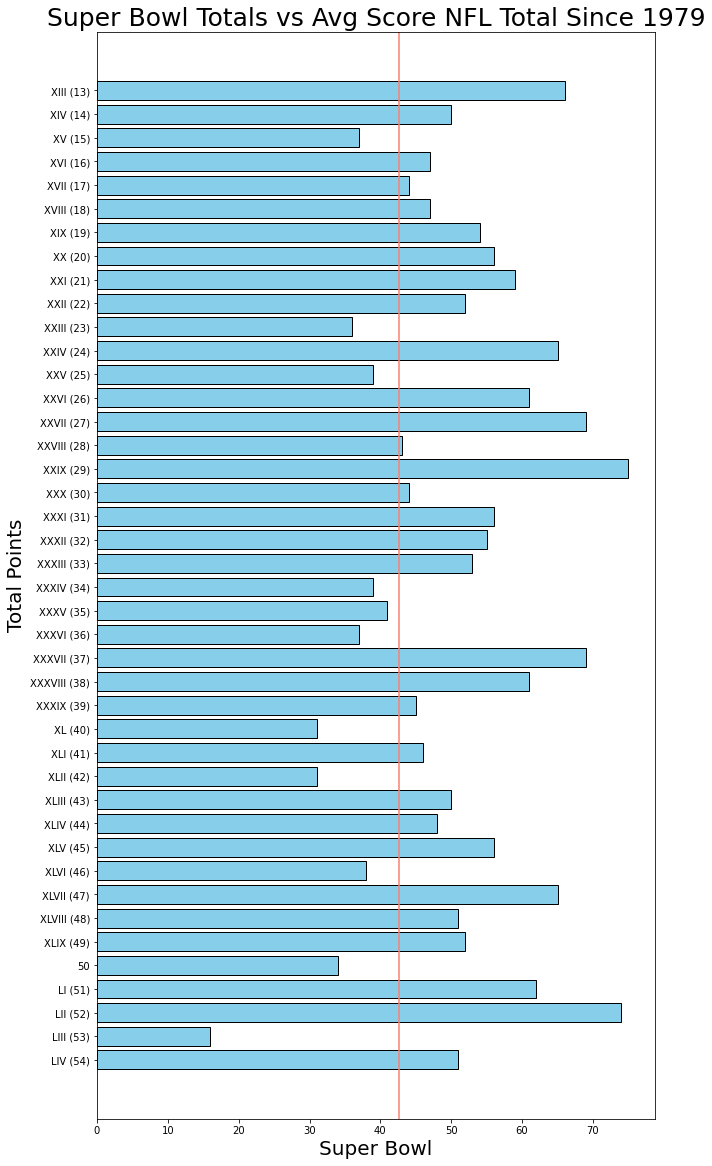

In [30]:
SB = summary2_sb_df['SB']
bars = (SB)
SB_val = summary2_sb_df['total_score']
y_pos = np.arange(len(bars))
#add line for average total score from 1979-2020
m = 42.656566

#change the size so the super bowls are actually visible
#I got this technique from:
#https://stackoverflow.com/questions/51080491/matplotlib-how-to-change-figsize-for-double-bar-plot
f, ax = plt.subplots(figsize=(10,20))

plt.barh(y_pos, SB_val, color=('skyblue'), edgecolor='black')
plt.title('Super Bowl Totals vs Avg Score NFL Total Since 1979', fontsize=25)
plt.xlabel('Super Bowl',fontsize=20)
plt.ylabel('Total Points',fontsize=20)
plt.yticks(y_pos, bars)

#Add line for average total score
plt.axvline(x=m, color='salmon')

plt.show()

In [31]:
#LOAD
#Connect to local database
rds_connection_string = "postgres:postgres@localhost:5432/ETL"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [32]:
engine.table_names()

['super_bowl', 'clean_odds']

In [33]:
df.to_sql(name='super_bowl', con=engine, if_exists='append', index=False)